In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn.cluster import KMeans
%matplotlib inline

desc = pd.read_csv("country_desc.csv")
desc

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [65]:
country = pd.read_csv("country.csv")
country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [66]:
country = country[["child_mort", "health"]]
country

,child_mort,health
0,90.2,7.58
1,16.6,6.55
2,27.3,4.17
3,119.0,2.85
4,10.3,6.03
...,...,...
162,29.2,5.25
163,17.1,4.91
164,23.3,6.84
165,56.3,5.18


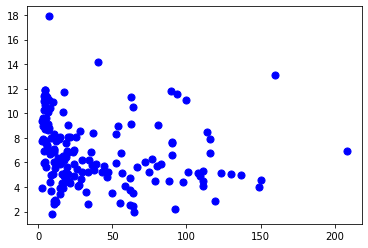

In [34]:
plt.scatter(country.values[ : , 0], country.values[ :, 1], s = 50, c = 'b')
plt.show()

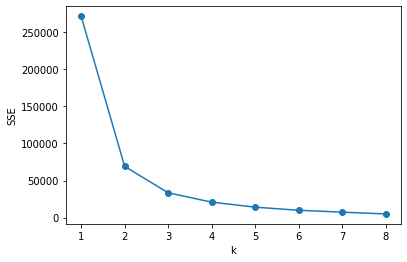

In [56]:
SSE = [] # Сумма квадратов ошибок для каждого результата
 
for k in range(1,9):
    estimator = KMeans (n_clusters = k) # построить кластер
    estimator.fit(country)
    SSE.append(estimator.inertia_)

X = range(1,9)
 
plt.xlabel('k')
 
plt.ylabel('SSE')
 
plt.plot(X,SSE,'o-')

In [47]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=2)
Kmean.fit(country.values)

KMeans(n_clusters=2)

In [48]:
centroids =Kmean.cluster_centers_ # поиск центроидов кластеров
centroids

array([[17.45772358,  7.07081301],
       [96.45      ,  6.1025    ]])

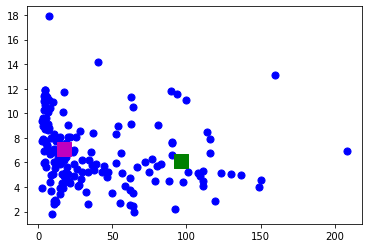

In [49]:
plt.scatter(country.values[ : , 0], country.values[ :, 1], s =50, c='b') # визуализация центроидов 
plt.scatter(centroids[1,0],centroids[1,1], s=200, c='g', marker='s')
plt.scatter(centroids[0,0],centroids[0,1], s=200, c='m', marker='s')
plt.show()

In [40]:
Kmean.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

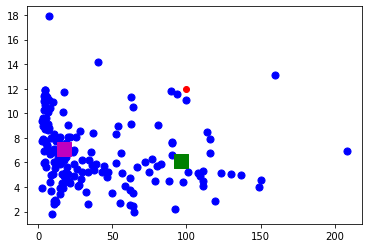

In [51]:
plt.scatter(country.values[ : , 0], country.values[ :, 1], s =50, c='b') # визуализация центроидов 
plt.scatter(centroids[1,0],centroids[1,1], s=200, c='g', marker='s')
plt.scatter(centroids[0,0],centroids[0,1], s=200, c='m', marker='s')
plt.plot(100,12,'ro') # визуализация заданной точки данных
plt.show()

In [57]:
Kmean.predict(np.array([100,12]).reshape(1, -1)) # прогноз принадлежности заданной точки данных кластеру

array([1])

In [71]:
from scipy.cluster.hierarchy import linkage, dendrogram
country = pd.read_csv("country.csv")

# Исключаем информацию об образцах зерна
varieties = list(country.pop('country'))

# Извлекаем измерения как массив NumPy
samples = country.values

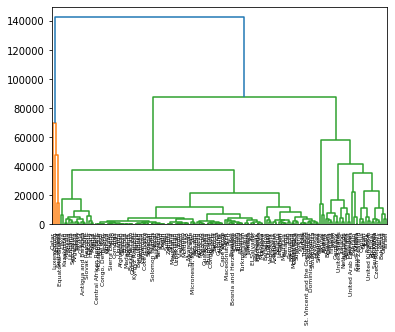

In [72]:
# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

In [74]:
from sklearn.metrics import silhouette_score

#Use silhouette score
range_n_clusters = list (range(2,10))
print ("Number of clusters from 2 to 9: \n", range_n_clusters)

df = pd.read_csv("country.csv")[["child_mort", "health"]]

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(df)
    centers = clusterer.cluster_centers_

    score = silhouette_score(df, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

Number of clusters from 2 to 9: 
 [2, 3, 4, 5, 6, 7, 8, 9]
For n_clusters = 2, silhouette score is 0.7043565157285362)
For n_clusters = 3, silhouette score is 0.674100111418724)
For n_clusters = 4, silhouette score is 0.641548512050804)
For n_clusters = 5, silhouette score is 0.5682795866683923)
For n_clusters = 6, silhouette score is 0.5462128759561741)
For n_clusters = 7, silhouette score is 0.5426209471290663)
For n_clusters = 8, silhouette score is 0.5456887228761041)
For n_clusters = 9, silhouette score is 0.5268399736220564)
